# Australia Wildfires 

Time Range: September- December 2019 

Event Type: Wildfire 

Event: Australia Wildfire 


*Intro Paragraph A:* Wildfires in Australia have been raging on for months, starting in September 2019 and intensifying to levels that caused a state of emergency to be declared in November 2019. By December 2019, more than 100,000 square miles of New South Wales, Australia’s most populous state, had been charred, impacting bushland, wooded areas, national parks, suburban homes, and creating thick smoke plumes in urban hubs. 

*Intro Paragraph B:* Historically, September in Australia is when Forest Fire Danger Index (FFDI) values are highest. 2019 was no exception, as the region began to experience severe wildfires that intensified to levels that caused a state of emergency to be declared in November 2019. By December 2019, more than 100,000 square miles of New South Wales had been charred, impacting bushland, wooded areas, national parks, suburban homes, and creating thick smoke plumes in urban hubs. 

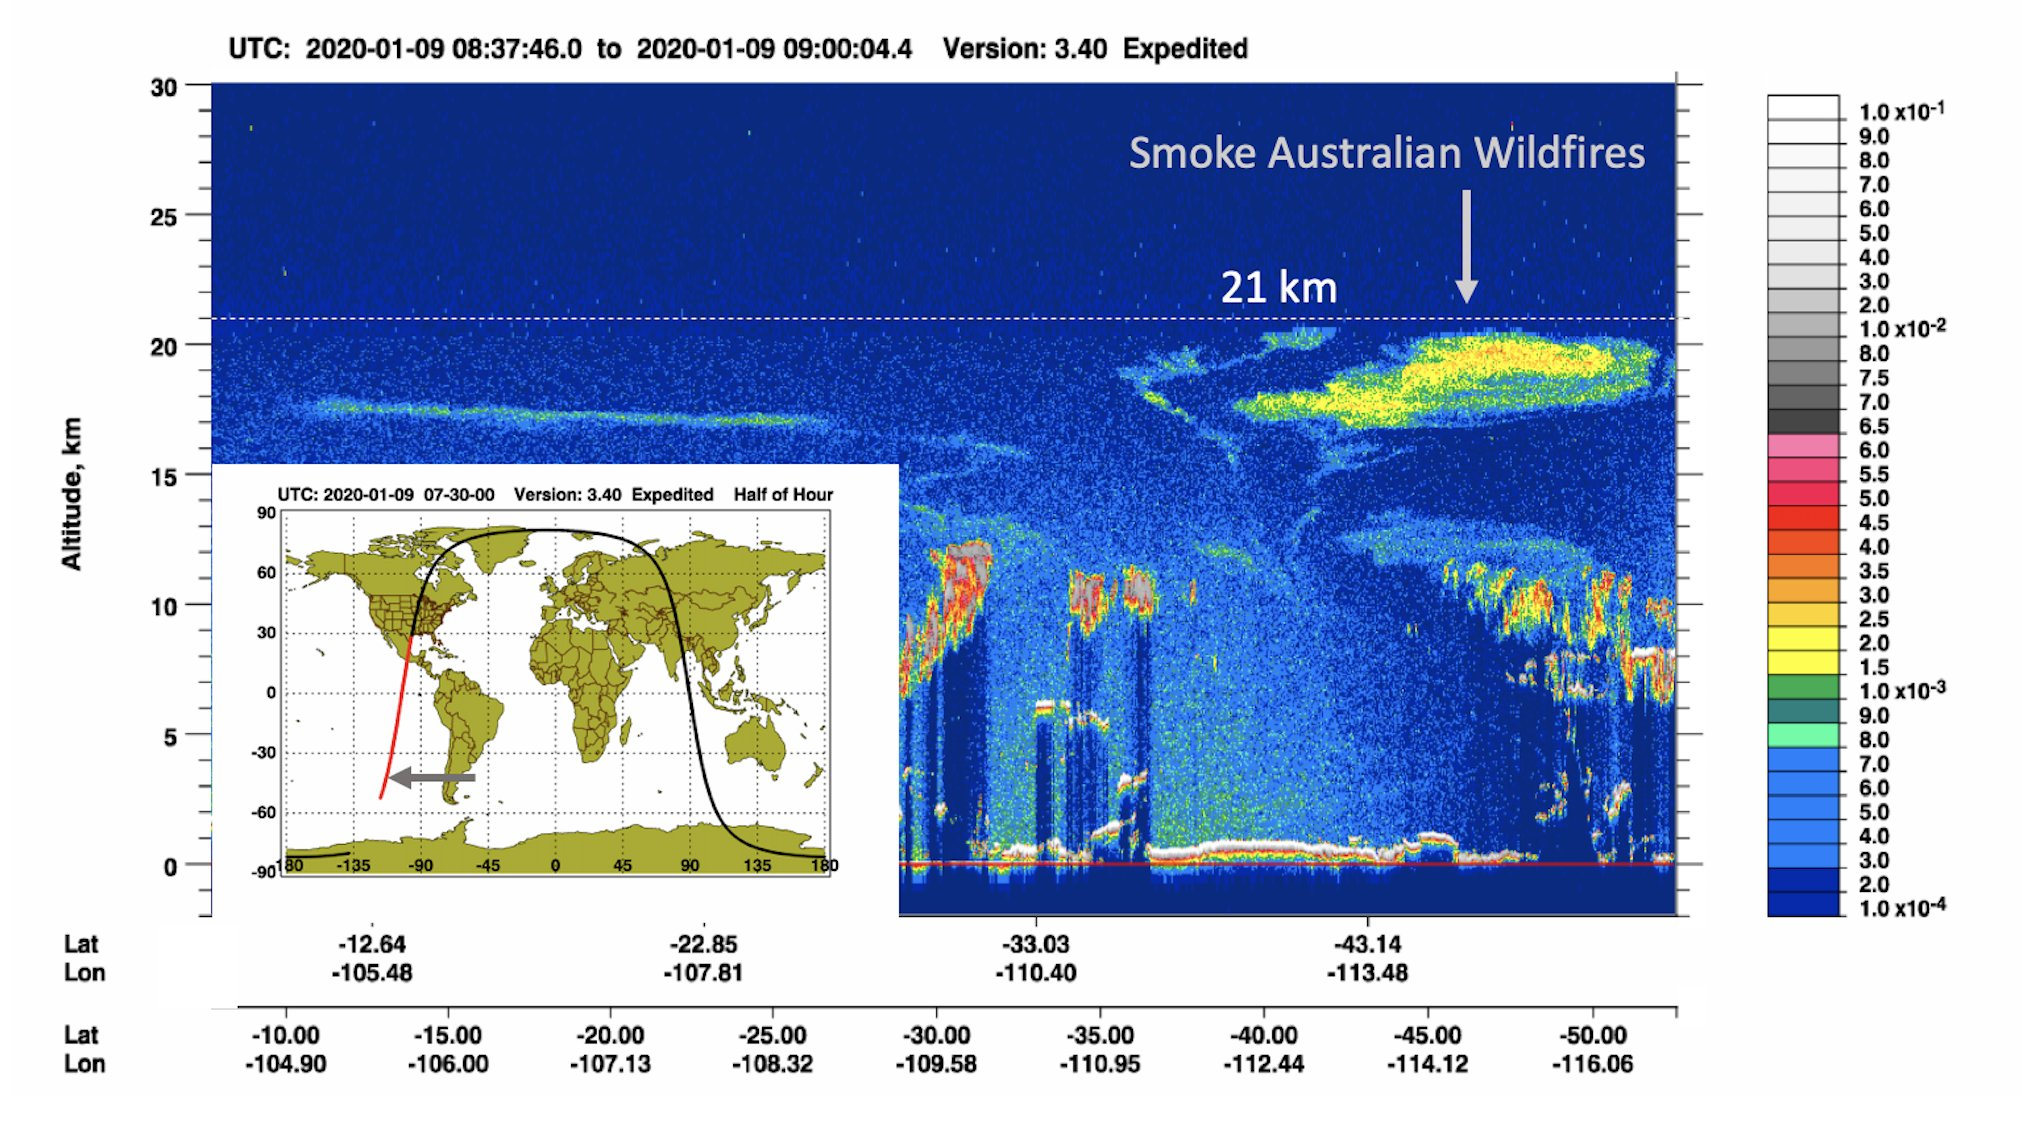

*Image Credit: Jean Paul Vernier, NASA Langley Research Center 

Each year, there is a fire season during the Australian summer, when hot, dry conditions make it easier for fires to start and spread. However, Australia has been experiencing one of its worst droughts in decades, and a heatwave in December broke the record for highest nationwide average temperature. These factors, coupled with strong winds, have made the fires and smoke spread more rapidly.  

Recently, a pair of bushfires in Southeastern Australia merged into a “megafire”, engulfing nearly 2,300 square miles (1.5 million acres). Some of the areas the fires have been burning in could take decades or longer to recover, and push some species to the brink of extinction. All these fires emit smoke, consisting of a combination of thousands of compounds, including greenhouse gases. The fires are estimated to have pumped around 400 million tons of carbon into the atmosphere.  

Smoke from the fires has reached the lower stratosphere and traveled as far away as Chile, and is also darkening snow on New Zealand’s mountaintops, as well as causing air quality issues possibly accelerating their rate of melting. 

The code below uses data from MISR to visualize the effect of aerosols from the wildfires in the atmosphere.

In [4]:
#library initialization

from __future__ import division
from matplotlib import animation
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
from matplotlib import colors
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.time import Time
import requests
import numpy as np
import io
import h5py
import time
import re
import os.path
import os
from pyhdf.SD import SD, SDC
import warnings; warnings.simplefilter('ignore')

In [5]:
FILE_NAME='MISR_AM1_CGAS_FIRSTLOOK_NOV_2019_F15_0032.nc'
url = 'https://opendap.larc.nasa.gov:443/opendap/MISR/MI3MAENF.002/2019.11.01/MISR_AM1_CGAS_FIRSTLOOK_NOV_2019_F15_0032.nc'
if not os.path.isfile(FILE_NAME):
    try:
        print("Attempting to download: "+FILE_NAME+" from the ASDC OPeNDAP service...")
        r = requests.get(url, allow_redirects=True)
        open(FILE_NAME, 'wb').write(r.content)
        if os.path.isfile(FILE_NAME):
            print("Success! The full path to the data file is: "+os.path.abspath(FILE_NAME))
    except Exception as e:
            print("Error: " + str(e))
            
#If you have already downloaded the file and it is already on your machine, you will get a message telling you so
# and it will not be re-downloaded.

else:
    print('Found '+os.path.abspath(FILE_NAME)+' on your system.\nSkipping the download process from the ASDC OPeNDAP Service.')


Found /Users/spaul2/Desktop/SOT Outreach/Jupyter Notebooks/MISR_AM1_CGAS_FIRSTLOOK_NOV_2019_F15_0032.nc on your system.
Skipping the download process from the ASDC OPeNDAP Service.


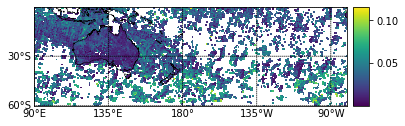

In [6]:
with h5py.File(FILE_NAME, mode='r') as f:
    # Identify the data field - the below line can be modified 
    var = f['/Aerosol_Parameter_Average/Medium_Mode_Aerosol_Optical_Depth']
    # Read data.
    data = var[:,:,3].astype(np.double)
    lat = f['/Aerosol_Parameter_Average/Latitude'][:]
    lon = f['/Aerosol_Parameter_Average/Longitude'][:]

    # Read attributes.
    # print(var.attrs.keys())

    #units = var.attrs['units']
    #long_name = var.attrs['long_name']

    # H5PY doesn't automatically turn the data into a masked array.
    fillvalue = var.attrs['_FillValue']
    data[data == fillvalue] = np.nan
    data = np.ma.masked_array(data, np.isnan(data))

    # The data is global, so render in a global projection.
   # The data is global, so render in a global projection.
    m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=-60, urcrnrlat=0,
            llcrnrlon=90, urcrnrlon=280)
    m.drawcoastlines(linewidth=0.5)
    m.drawparallels(np.arange(-90, 91, 30), labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180, 181, 45), labels=[0, 0, 0, 1])
    m.pcolormesh(lon, lat, data, latlon=True)
    #m.scatter(lon, lat, c=data, s=0.1, cmap=plt.cm.jet, edgecolors=None, linewidth=0)
    
    cb = m.colorbar()
  #  cb.set_label(units)

    basename = os.path.basename(FILE_NAME)
   # plt.title('{0}\n{1}'.format(basename, long_name), fontsize=8)
    fig = plt.gcf()
    plt.show()
    #pngfile = "{0}.py.png".format(basename)
    #fig.savefig(pngfile)